## Import test and training data from data_pol_fit.pkl

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
with open('data_pol_fit.pkl', 'rb') as handle:
    data = pickle.load(handle)
    
x_train = data['x_train'].T
x_test = data['x_test'].T
y_train = data['y_train'].T
y_test = data['y_test'].T

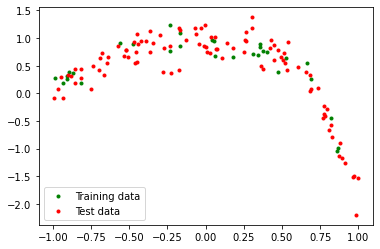

In [3]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='r', marker='.', label="Test data")
ax.legend()
plt.show()

## Define function poly

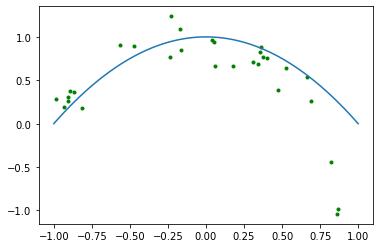

In [4]:
def poly(x, weight):
    # TODO: Question 1
    # /TODO
    y = 0
    for i in range(len(weight)):
        y = y + (x**i * weight[i])
    return y

# Visualize the function to check if it is correct.
w = [1, 0, -1]
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
plt.show()

## Define embedding function

In [5]:
# x is expected to be a numpy array of dimensions (N,)
def embedding_func(x, K):
    # TODO: Question 1
    # /TODO
    
    # Set the empty matrix
    F = np.empty((len(x), K + 1))
    
    # Calculate the F matrix value
    for i in range(len(x)):
        for j in range(K + 1):
            F[i][j] = x[i]**j 
    return F
x = np.array([2, 3])
print(embedding_func(x, 4))

[[ 1.  2.  4.  8. 16.]
 [ 1.  3.  9. 27. 81.]]


## Define a function that fits a K-th order polynomial and returns a weight vector w

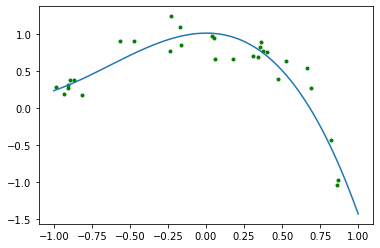

In [6]:
def estimate_w(y, x, K):
    # TODO: Question 1
    # /TODO
    
    # Set the empty matrix
    x_matrix = np.empty((len(x), K + 1))
    
    # Calculate the x_matrix matrix value
    for i in range(len(x)):
        for j in range(K + 1):
            x_matrix[i][j] = x[i]**j
            
    # W = (X^T * X)^{-1} * X^T * y
    w = np.linalg.solve((np.transpose(x_matrix) @ x_matrix), np.transpose(x_matrix)) @ y
    return w

w = estimate_w(y_train, x_train, 3)
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
plt.show()

## Fit 0-th to 10-th order polynomials to training data and plot resulting functions

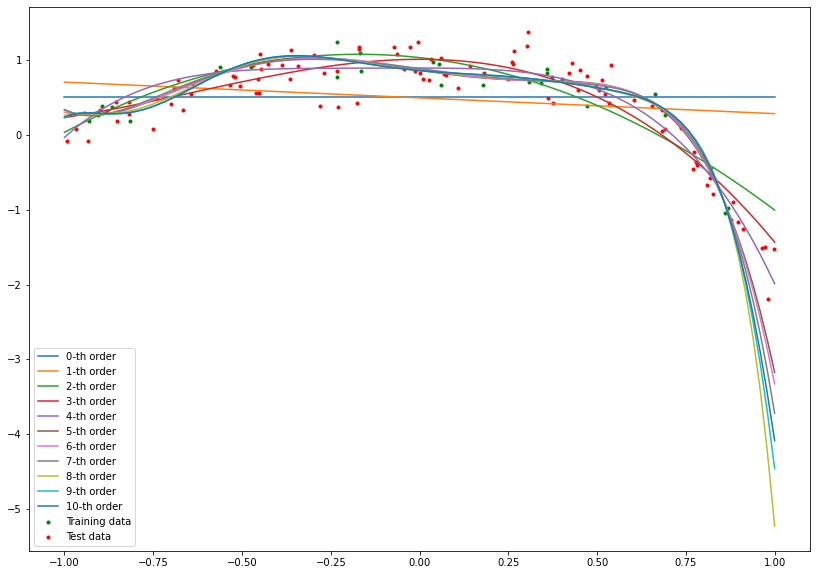

In [7]:
K_max = 10

weights = []

x = np.linspace(-1.0, 1.0, num=100, endpoint=True)

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='r', marker='.', label="Test data")

for K in range(K_max+1):
    # TODO: Question 2
    # /TODO
    weights = estimate_w(y_train, x_train, K)  # Fit training data
    poly_function_value = poly(x, weights)
    ax.plot(x, poly_function_value, label = str(K) + "-th order")

ax.legend()
plt.show()

## Compute the train and test error

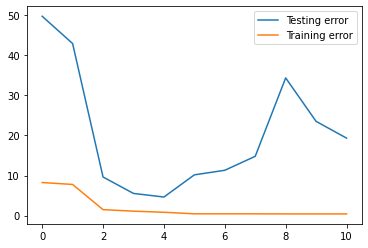

In [8]:
error_train = np.zeros(K_max+1)
error_test = np.zeros(K_max+1)

for poly_degree in range(K_max+1):
    # TODO: Question 3
    # /TODO

    weights_train = estimate_w(y_train, x_train, poly_degree)
    
    # Compute the train error
    for i in range(len(y_train)):
        error_train[poly_degree] = error_train[poly_degree] + (y_train[i] - poly(x_train[i], weights_train))**2 
    
    # Compute the test error
    for j in range(len(y_test)):
        error_test[poly_degree] = error_test[poly_degree] + (y_test[j] - poly(x_test[j], weights_train))**2

fig, ax = plt.subplots()
ax.plot(error_test, label="Testing error")
ax.plot(error_train, label="Training error")
ax.legend()
plt.show()

## TODO: Question 3 (Comment results)

### Ans: 
### After 4th poly approximation, we start to have increase in error. The reason behind it is likely to be "OverFitting". In overfitting, our models get too close to the training set, that it no longer reflects proper underlying relationship between x and y, and thus resulted in greater loss.

# Linear versus Logistic regression

## Import data from data_lin_vs_log.pkl

In [9]:
def evaluate_linear_discriminant_on_grid(w_linear, loc_x, loc_y):
    grid_x, grid_y = np.meshgrid(loc_x, loc_y)
    sz_m, sz_n = grid_x.shape
    res = w_linear[0]*grid_x + w_linear[1]*grid_y + w_linear[2]
    
    return res, grid_x, grid_y

In [10]:
# Load the dataset
# Load the file data_lin_vs_log.pkl
with open('data_lin_vs_log.pkl', 'rb') as handle:
    data= pickle.load(handle)
    
test_features = data['test_features']
test_labels = data['test_labels']
train_features = data['train_features']
train_labels = data['train_labels']

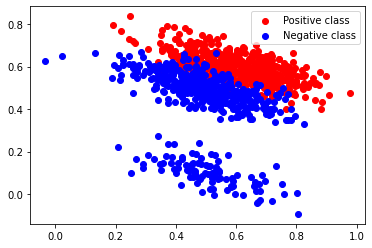

In [11]:
# Display your data
pos = np.nonzero(train_labels==1)[1]
neg = np.nonzero(train_labels!=1)[1]

fig, ax = plt.subplots()
ax.scatter(train_features[0, pos], train_features[1,pos], c="r", label="Positive class")
ax.scatter(train_features[0, neg], train_features[1,neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

## Linear Regression

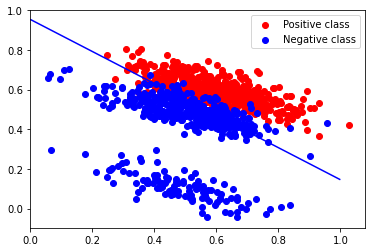

In [12]:
##---------------------------------------------------------------
## First part - (done for you)
##---------------------------------------------------------------

## Train a linear classifier

## in slide 70, Lecture 1, X was (Ndata x Ndimensions), Y was (Ndata x 1)
## Now the size of train_features is Ndimensions x Ndata and of Y is 1 x Ndata
## so we transpose train_features and train_data to get X and Y respectively
X = train_features.T
Y = train_labels.T

## form X^T X
XX = np.dot(X.T, X)

## form X^T Y
YX = np.dot(X.T, Y)

## solve w = (X^T X)^{-1} (X^T Y)
w = np.linalg.solve(XX, YX)

## visualize classifier
fig, ax = plt.subplots()
## step 1: get its value over a regular grid of positions
loc_x = np.arange(0, 1.01, .01)
loc_y = np.arange(0, 1.01, .01)
function_values, grid_x, grid_y = evaluate_linear_discriminant_on_grid(w, loc_x, loc_y)

## step 2: plot the set of positions where its value equals .5
contour_values = [.5]
contPlt = ax.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)

## step 3: superimpose the points of the test set
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

## Logistic regression

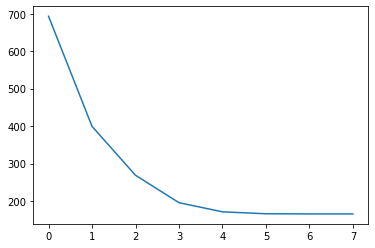

In [13]:
##---------------------------------------------------------------
## Second part - logistic regression
##---------------------------------------------------------------
w = np.array([[0], [0], [0]]) # Initialize w
loss = []

while 1: # Continue until converge criterion is met
    # TODO (Question 4 and 5)
    # /TODO
    Sum_Of_Loss = 0
    Matrix_Value = 0
    
    alpha = np.dot(X, w) 
    sigmoidal = 1 / (1 + np.exp(-alpha))
    
    # Define the Gradient vector and R matrix and Calculate the value
    Gradient_vector = np.empty(len(w))
    R_matrix = np.empty((len(Y), len(Y)))
    
    Gradient_vector = - np.transpose((Y - sigmoidal)) @ X
    
    # R matrix is a Diagonal matrix (set the value of the matrix)
    Matrix_Value = np.diag(sigmoidal @ np.transpose(1 - sigmoidal))
    R_matrix = np.diag(Matrix_Value)
    
    # Calculate the loss_value of all element
    Sum_Of_Loss = np.sum(-(Y*np.log(sigmoidal) + (1 - Y)*np.log(1 - sigmoidal)))
    loss = loss + [Sum_Of_Loss]
    
    # H = transpose(X) @ R @ X
    H_inverse = np.linalg.inv(np.transpose(X) @ R_matrix @ X)
    
    # w[i + 1] = w[i] - H^{-1} @ Gradient
    w_new_vector = w - H_inverse @ np.transpose(Gradient_vector)
    
    # Define the convergence condition on the assignment to and compare whether achieve the convergence
    convergence_value = np.linalg.norm(w_new_vector - w)
    compare_value = 0.001 * np.linalg.norm(w)

    if convergence_value < compare_value:
        break
    else:
        w = w_new_vector
                        
fig, ax = plt.subplots()
ax.plot(loss)
plt.show()

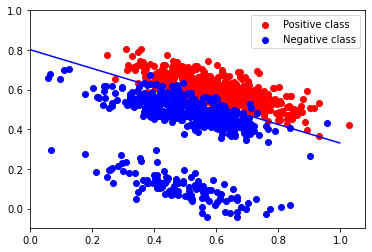

In [14]:
## Step 1: get its value over a regular grid of positions
## Step 2: plot the set of positions where its value equals .5
# TODO: Question 6

# /TODO

## visualize classifier
fig, ax = plt.subplots()

## step 1: get its value over a regular grid of positions
loc_x = np.arange(0, 1.01, .01)
loc_y = np.arange(0, 1.01, .01)
function_values, grid_x, grid_y = evaluate_linear_discriminant_on_grid(w, loc_x, loc_y)

## change linear to logistic
function_values = 1 / (1 + np.exp(-function_values))

## step 2: plot the set of positions where its value equals .5
contour_values = [.5]
contPlt = ax.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)

## Step 3: superimpose the points of the test set
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

## TODO: Question 6 (Comment results)

### Ans: 
### On the basis of the two experiments, we can understand that in this experiment, linear regression is not suitable to two categories classification. We can notice that the line (boundary) of the linear regression is easily affected by the deviation value, if the datasets have large numbers of the deviation value, it will impact the line (boundary) directly, and exhibit a poor result. Whereas, the logistic regression can deal with this problem more easily, it can divide the groups into different categories (such as value < 0 is group negative and >= 0 is group positive) at first, therefore, after classification, it can classify more accurate and obtain the better line (boundary) such as plot result above.   